- 머신러닝I 과 II 는 분류 문제
- 머신러닝III 회귀
  - 미래의 값을 예측

In [1]:
import numpy as np
length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

머신러닝모델은?
  - k-최근접 이웃알고리즘
    - 분류와 회귀알고리즘이 둘다 내장되어 있다

싸이킷런 계열의 머신러닝 모델은 거의 모두 두가지다 가능하다

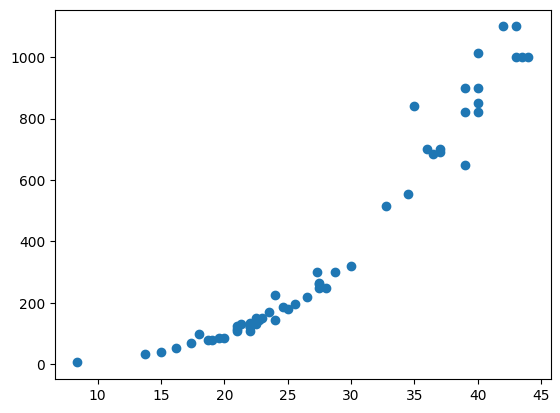

In [2]:
import matplotlib.pyplot as plt
plt.scatter(length,weight)
plt.show()

In [3]:
# 데이터 전처리
  # 이상치제거, 결측치처리, 표준화
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(length,weight,random_state=50)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train.reshape(-1,1))
x_test_scaled = ss.transform(X_test.reshape(-1,1))

In [4]:
X_train.shape,X_test.shape

((42,), (14,))

R^2
  - 결정계수
    - 회귀분석에서 많이 사용하는 측정 단위
    - 0 ~ 1사이의 값 높을수록 좋다
    - 과적합(Overfiting) 을 고려

In [5]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(X_train_scaled,y_train)
knr.score(x_test_scaled,y_test)

0.960708316746975

In [6]:
knr.predict(x_test_scaled),y_test

(array([ 815. ,   67.9,  182.6,  646. ,   95.6,  254.4,  746.2,  746.2,
         646. ,  116. ,  897. , 1043. ,  123. ,  897. ]),
 array([ 900.,   32.,  145.,  840.,   85.,  218.,  685.,  700.,  700.,
         130.,  820., 1000.,  130.,  850.]))

절대값 평균 오차
  - 실제값 - 모델이 예측한값의 절대값들의 평균

In [7]:
np.abs(knr.predict(x_test_scaled)-y_test).mean()

53.49285714285715

In [8]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,knr.predict(x_test_scaled))

53.49285714285715

과적합(over fitting)
  - 과대적합 : 너무 많이 학습한 상태
    - 학습한데이터에 대한 평가는 높고 비학습 데이터에대한 평가는 낮음
    - ex 99%  80%
  - 과소적합 : 너무 학습을 안한상태
    - ex 65%  60%

In [9]:
# 시각화를 통해 학습현황을 볼수있다.
# 과적합이 발생하는 이유
#  과도한 학습으로 인해서 학습데이터만 맞추는 현상
#  머신러니의 주요 파라메터의 값에 의해서 좌우
# Kneighbors  이웃의 개수

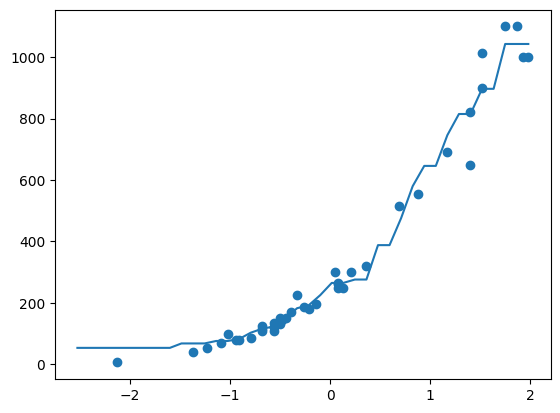

In [10]:
# k 최근접이웃 알고지금의 모델을 생성
knr = KNeighborsRegressor()
X = np.arange(5,45).reshape(-1,1)
knr.fit(X_train_scaled,y_train)
# 임의의 x값에대해서 예측값을 얻는다
X = ss.transform(X)
prediction = knr.predict(X)
# 훈련세트와 예측결과를 시각화
plt.scatter(X_train_scaled, y_train)
plt.plot(X,prediction)
plt.show()

이웃의 개수를 1 5 10 으로 해서 학습하고 시각화

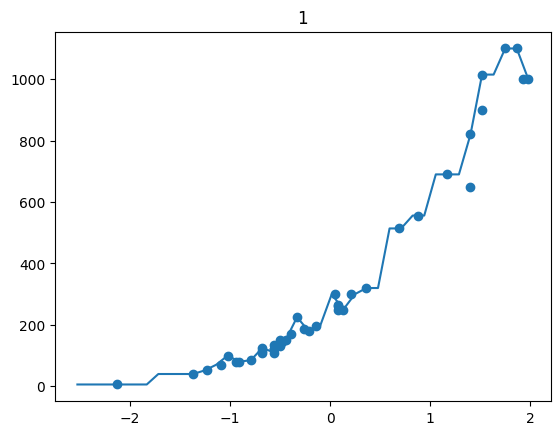

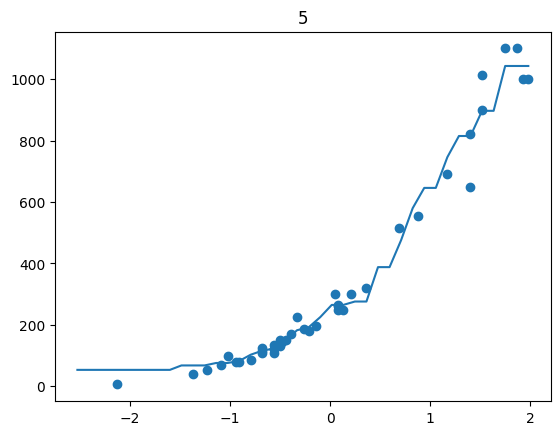

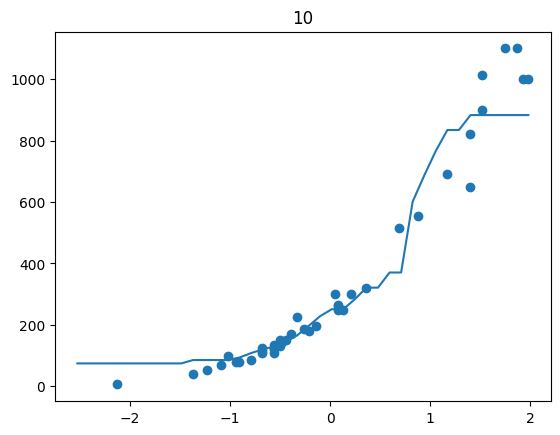

In [11]:
import matplotlib.pyplot as plt

for n in [1,5,10]:
  # k 최근접이웃 알고지금의 모델을 생성
  knr = KNeighborsRegressor(n_neighbors=n)
  X = np.arange(5,45).reshape(-1,1)
  knr.fit(X_train_scaled,y_train)
  # 임의의 x값에대해서 예측값을 얻는다
  X = ss.transform(X)
  prediction = knr.predict(X)
  # 훈련세트와 예측결과를 시각화
  plt.scatter(X_train_scaled, y_train)
  plt.plot(X,prediction)
  plt.title(n)
  plt.show()

k-최근접 이웃의 한계
  - 유클리안 거리를 기반으로한 오차에대한 알고리즘
  - 학습데이터를 벗어난 데이터는 예측에 한계가 있다.

k-최근접이웃 회귀 모델

In [12]:
knr = KNeighborsRegressor()
knr.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [13]:
X_train_scaled.shape

(42, 1)

In [14]:
knr.predict([[50]])

array([1043.])

In [16]:
# k-최근접 모델이 50인 데이터가 값이 왜 1043. 인지 확인(시각화)
# x 가 한개의 변수면 표준화를 할 필요가 없음

In [20]:
X = length
y = weight
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=50)
knr = KNeighborsRegressor()
knr.fit(X_train.reshape(-1,1),y_train)
print(knr.predict([[50]]))
distances, indexes =  knr.kneighbors([[50]])

[1043.]


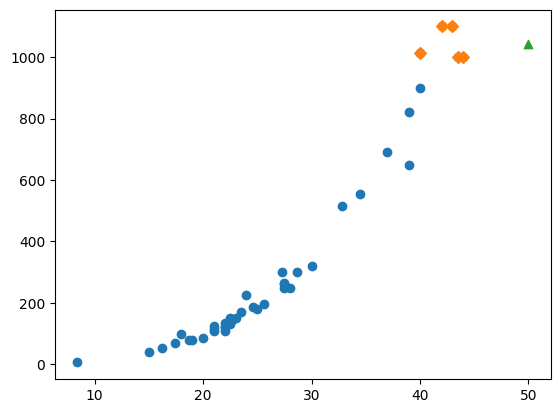

In [24]:
plt.scatter(X_train,y_train)
plt.scatter(X_train[indexes],y_train[indexes],marker='D')
plt.scatter(50,1043,marker='^')
plt.show()

In [25]:
# 길이가 100인 데이터의 무게는?
knr.predict([[100]])

array([1043.])

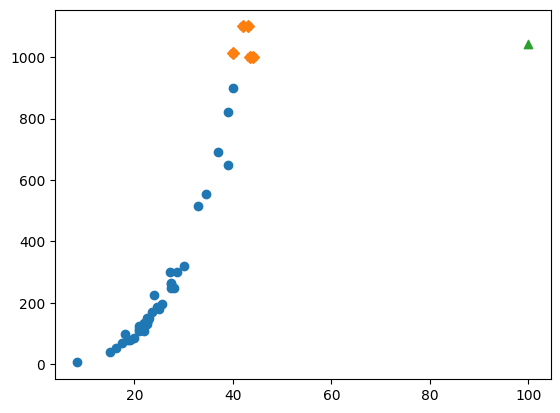

In [27]:
distances,indexes = knr.kneighbors([[100]])
plt.scatter(X_train,y_train)
plt.scatter(X_train[indexes],y_train[indexes],marker='D')
plt.scatter(100,1043,marker='^')
plt.show()